In [5]:
import pandas as pd
import numpy as np
import helper
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
style.use('fivethirtyeight')

In [6]:
colors = ["#FF0B04", "#F1BE48",
           "#B9975B", "#8B5B29",
           "#524727",
         ]
sns.set_palette(sns.color_palette(colors))

In [7]:
hous_df = pd.read_csv('Ames_Housing_Price_Data.csv', low_memory=False)

In [8]:
hous_df.head()

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [4]:
## Lose the phony index column (that supposedly differentiates between kaggle/non-kaggle training data).
hous_df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
## There is a duplicate to take care of.
hous_df.drop_duplicates(inplace=True)
hous_df.reset_index(drop=True, inplace=True)

In [6]:
## Exclude all 'SaleCondition' other than 'Normal' and 'Partial'
hous_all = hous_df[(hous_df['SaleCondition'] == 'Normal') | (hous_df['SaleCondition'] == 'Partial')].reset_index(drop=True)

In [7]:
# Perform the split using stratified sampling based on 'Neighborhood'.
hous_trn, hous_tst = helper.stratified_split(hous_all, 'Neighborhood')

In [8]:
print(hous_all.shape)
print(hous_trn.shape)
print(hous_tst.shape)

(2495, 81)
(1871, 81)
(624, 81)


In [9]:
df_dict = {'All':hous_all, 'Train':hous_trn, 'Test':hous_tst}

In [10]:
plot_order = np.sort(hous_all['Neighborhood'].unique())

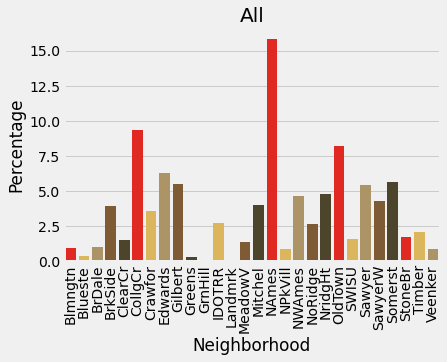

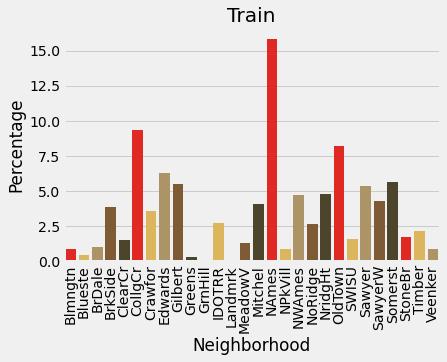

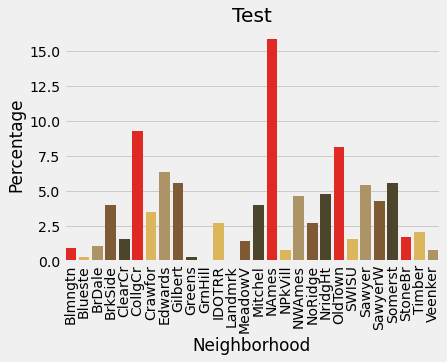

In [11]:
for label in df_dict.keys():
    data = df_dict[label]
    _=sns.barplot(x='Neighborhood', y='SalePrice', data=data, 
                            estimator=lambda y: len(y) / len(data) * 100, order=plot_order, palette=colors)
    _.tick_params(axis='x', rotation=90)
    _.set(ylabel='Percentage', title=label)
    plt.show()

In [12]:
hous_all.to_csv("all.csv")
hous_trn.to_csv("train.csv")
hous_tst.to_csv("test.csv")